<a href="https://colab.research.google.com/github/AdrianCPC/Primeros_pasos_IA/blob/main/Lenguaje_Natural_Introduccion_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Configuracion ambiente e importacion de librerias

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None) # se observan mejor los datos
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')


#2. Extraccion de datos y primeros analisis exploratorios

In [2]:
df_elections = pd.read_csv('/content/sample_data/colombian_elections.csv')
df_elections.head()

,Unnamed: 0,tweet_id,tweetText,polarity_value,polarity_type,topic,set
0,2,ID:142391947707940864,@marodriguezb Gracias MAR,P,AGREEMENT,otros,train
1,3,ID:142416095012339712,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N,AGREEMENT,política,train
2,4,ID:142422495721562112,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P,AGREEMENT,otros,train
3,6,ID:142483342040907776,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,P,AGREEMENT,entretenimiento,train
4,8,ID:142494476051562496,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,P,AGREEMENT,otros,train


In [3]:
df_elections = df_elections[['tweetText','polarity_value']].rename(columns={'tweetText':'texto', 'polarity_value':'sentimiento'}) #cambio de nombre de columnas

In [4]:
df_elections.head()

,texto,sentimiento
0,@marodriguezb Gracias MAR,P
1,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N
2,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P
3,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,P
4,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,P


#3. Construccion del modelo

In [5]:
#verificacion si estan balanceados los sentimientos en el df
df_elections['sentimiento'].value_counts()

P    2884
N    2182
Name: sentimiento, dtype: int64

In [6]:
# Entrenamiento del modelo
from sklearn.model_selection import train_test_split

In [7]:
X_train, x_test, y_train, y_test = train_test_split(df_elections.texto, df_elections.sentimiento, random_state=20)

In [8]:
X_train[:5]

3782                                               B. Días. Messi pasa a la historia, una vez más. Cinco goles en un partido de Champions.
2255    “@pedro_jose7 El Semanal Digital es de lo mejor que hay en la red para mantenerse bien informado. Felicidades.” Muchas gracias!!!!
312                                                                           Madrid. Gracias por vuestro cariño. Ha sido un placer!!!!!!.
1169                                                Creo @Juandecolmenero  que lo de @deguindosluis  es un fake. Así que nos hemos colado.
3965                                                                                                               Buenos días ;-)) #lunes
Name: texto, dtype: object

In [9]:
y_train[:5]

3782    P
2255    P
312     P
1169    N
3965    P
Name: sentimiento, dtype: object

In [10]:
#Aplicando regresion logistica
from sklearn.linear_model import LogisticRegression

In [11]:
regression = LogisticRegression

In [12]:
#Entrenando el modelo
regression.fit(X_train, y_train)
acc = regression.score(x_test,y_test)
print(acc)

TypeError: ignored

In [13]:
df_elections['sentiment'] = df_elections['sentimiento'].replace(['N','P'],[0,1])

In [14]:
df_elections.head()

,texto,sentimiento,sentiment
0,@marodriguezb Gracias MAR,P,1
1,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N,0
2,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P,1
3,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,P,1
4,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,P,1


Lo que aprendimos en esta aula:

Un modelo de machine learning para clasificar datos textuales.

Cómo realizar pré-análisis de datos textuales.

Un clasificador estándar para Análisis de Sentimiento.

#5. Extraccion de texto

In [15]:
from nltk import tokenize

In [16]:
frase = 'hola chicos y chicas'

token_puntuacion = tokenize.WordPunctTokenizer()

token_frase = token_puntuacion.tokenize(frase)

print(token_frase)

['hola', 'chicos', 'y', 'chicas']


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
texto = ['Las propuestas son buenas', 'las propuestas no son buenas']

In [19]:
vectorizer =  CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(texto)

In [20]:
bag_of_words

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [21]:
print(bag_of_words.shape)

(2, 6)


In [22]:
vectorizer.get_feature_names_out()

array(['Las', 'buenas', 'las', 'no', 'propuestas', 'son'], dtype=object)

In [23]:
matriz = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns = vectorizer.get_feature_names_out())
matriz

,Las,buenas,las,no,propuestas,son
0,1,1,0,0,1,1
1,0,1,1,1,1,1


In [24]:
vectorizer2 =  CountVectorizer(lowercase=True, max_features=100)
bag_of_words2 = vectorizer2.fit_transform(df_elections.texto)

In [25]:
print(bag_of_words2.shape)

(5066, 100)


In [26]:
#Ahora se sigue con el modelo
X_train, x_test, y_train, y_test = train_test_split(bag_of_words2, df_elections.sentiment, random_state=20)


In [27]:
#Entrenando el modelo
regression = LogisticRegression()

regression.fit(X_train, y_train)
acc = regression.score(x_test,y_test)
print(acc)

0.7000789265982637


Lo que aprendimos en esta aula:

Una forma de vectorizar textos: bag of words (BOW).

Cómo usar python para crear o BOW.

Cómo entrenar y clasificar los dados para el Análisis de Sentimiento.

Cómo medir los resultados del análisis de Sentimientos.

#6. Clasificacion

In [28]:
#Creando funcion clasificador
def clasificador(df_elections, columna_texto, columna_categoria):
  vectorizer = CountVectorizer(lowercase=True, max_features=100) #100 palabras mas relevantes por cada tweet
  bag_of_words = vectorizer.fit_transform(df_elections[columna_texto])

  X_train, x_test, y_train, y_test = train_test_split(bag_of_words, df_elections[columna_categoria], random_state=20)

  regression = LogisticRegression()

  regression.fit(X_train, y_train)
  return regression.score(x_test,y_test)



In [29]:
clasificador(df_elections, 'texto','sentiment')

0.7000789265982637

In [30]:
#Usando world cloud para visualizar
from wordcloud import WordCloud

In [31]:
palabras = ' '.join([palabras for palabras in df_elections['texto']])
palabras

'@marodriguezb Gracias MAR Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento) Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo! Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas! Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana. Desde el escaño. Todo listo para empezar #endiascomohoy en el Congreso http://t.co/Mu2yIgCb Bdías. EM no se ira de puente. Si vosotros os vais no dejeis de llevar la tableta o el PC y desde luego Orbyt. De momento no digo más. Un sistema económico q recorta dinero para prestaciones sociales y refuerza con billón y medio d euros a los bancos, no necesita repensarse? #programascambiados caca d ajuste Buen viernes “@adri_22_22: #programascambiados es TT gracias a @Carlos_Latre” GRACIAS POR EL BUEN RATO AMIGOS!!;) La Universidad confía en De la Calle para encarar su

In [32]:
len(palabras)

556945

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline


In [34]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud)
  plt.axis('off')

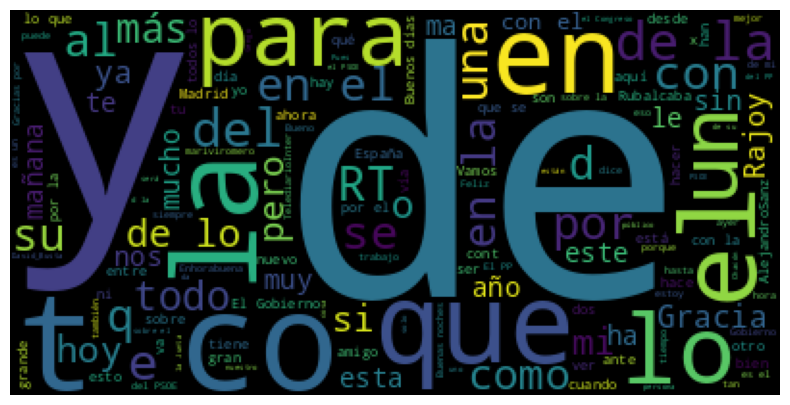

In [35]:
wordcloud = WordCloud().generate(palabras)
plot_cloud(wordcloud)

In [36]:
#mejorando el wordcloud
def plot_cloud(wordcloud):
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')

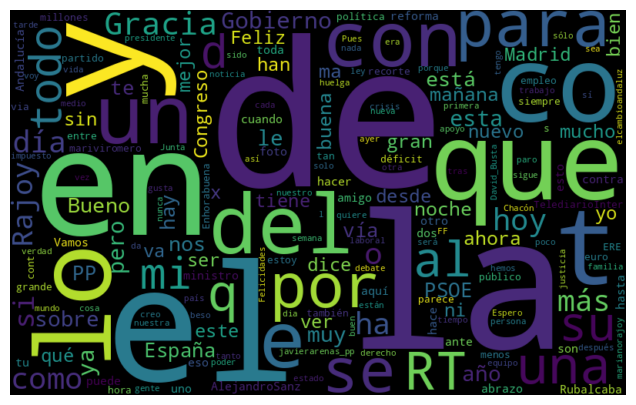

In [37]:

wordcloud = WordCloud(width=800, height=500,collocations=False).generate(palabras)
plot_cloud(wordcloud)

In [38]:
#Creando visualizacion para los dos casos

df_neg = df_elections.query('sentimiento == "N"')
df_neg.head()

,texto,sentimiento,sentiment
1,"Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)",N,0
8,#programascambiados caca d ajuste,N,0
13,abcdesevilla.es: Recio no tiene «indicios potentes» para denunciar a los responsables de los ERE http://t.co/wlDSs1yQ,N,0
14,"abcdesevilla.es: Cuatro altos cargos de Empleo, denunciados por retirar la prejubilación a extrabajadores http://t.co/LWHxzbuB",N,0
15,La marcha atrás del PP en posponer devolución CCAA es un resbalón. Debería asumir fallo y no mentir diciendo que no conoce estado cuentas,N,0


In [39]:
df_pos = df_elections.query('sentimiento == "P"')
df_pos.head()

,texto,sentimiento,sentiment
0,@marodriguezb Gracias MAR,P,1
2,Conozco a alguien q es adicto al drama! Ja ja ja te suena d algo!,P,1
3,Toca @crackoviadeTV3 . Grabación dl especial Navideño...Mari crismas!,P,1
4,Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia @libertadmontes Hoy podría ser un día para la grandeza humana.,P,1
5,Desde el escaño. Todo listo para empezar #endiascomohoy en el Congreso http://t.co/Mu2yIgCb,P,1


In [40]:
def plot_cloud_neg(wordcloud):
  df_neg = df_elections.query('sentimiento == "N"')
  palabras = ' '.join([palabras for palabras in df_neg['texto']])
  wordcloud = WordCloud(width=800, height=500,collocations=False).generate(palabras)

  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')

In [41]:
def plot_cloud_pos(wordcloud):
  df_pos = df_elections.query('sentimiento == "P"')
  palabras = ' '.join([palabras for palabras in df_pos['texto']])
  wordcloud = WordCloud(width=800, height=500,collocations=False).generate(palabras)

  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')

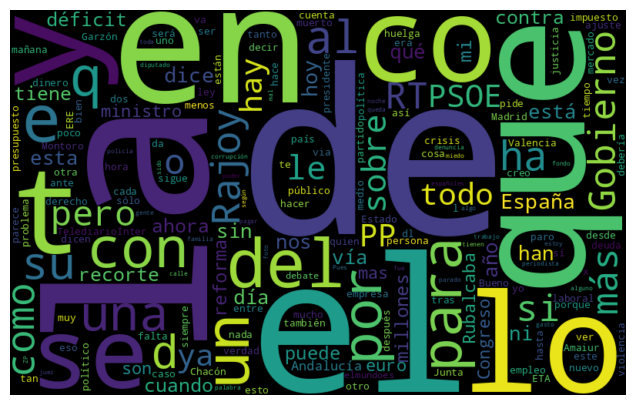

In [42]:
plot_cloud_neg(df_elections)

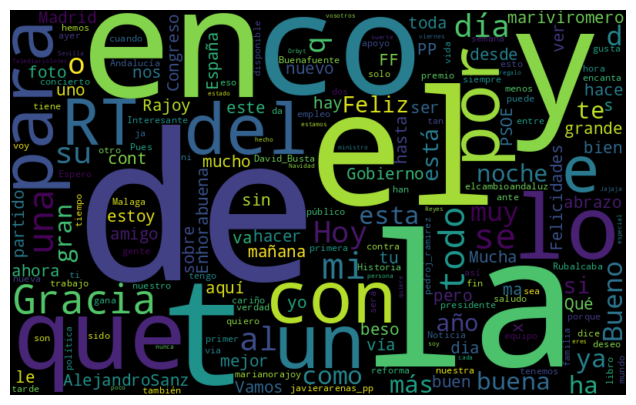

In [43]:
plot_cloud_pos(df_elections)

Lo que aprendimos en esta aula:

El concepto de word cloud.

Cómo usar la biblioteca WordCloud para crear nuestra nube de palabras.

Cómo utilizar word cloud en el análisis de sentimiento.

Cómo crear un nuevo conjunto de datos apenas con sentimientos negativos o positivos usando la función query de pandas

#7. Calculo de palabras

In [44]:
import nltk

In [45]:
frase = ['el candidato es bueno', 'el candidato es malo']
frecuencia = nltk.FreqDist(frase)

In [46]:
frecuencia

FreqDist({'el candidato es bueno': 1, 'el candidato es malo': 1})

In [47]:
from nltk import tokenize


In [48]:
frase2 = 'hola chicos y chicas'

#Instancias por espacios
token_espacio = tokenize.WhitespaceTokenizer()

frase_token = token_espacio.tokenize(frase2)

In [49]:
frase_token

['hola', 'chicos', 'y', 'chicas']

In [50]:
frase_token = token_espacio.tokenize(palabras)
frecuencia = nltk.FreqDist(frase_token)

In [51]:
#construir DF para organizar los datos
df_frecuencia = pd.DataFrame({'palabra': list(frecuencia.keys()), 'frecuencia':list(frecuencia.values())})

In [53]:
df_frecuencia.head()

,palabra,frecuencia
0,@marodriguezb,3
1,Gracias,119
2,MAR,1
3,Off,1
4,pensando,5


In [54]:
#Ordenando las fecuencias
df_frecuencia.nlargest(columns='frecuencia', n=10)

,palabra,frecuencia
13,de,3863
9,la,2365
6,el,1929
5,en,1886
26,a,1886
57,y,1655
10,que,1575
107,los,934
170,del,863
20,no,713
